<a href="https://colab.research.google.com/github/Isenlith/ProcImag/blob/master/B%C3%A1sico_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [0]:
img = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)
altura = img.shape[0]
largura = img.shape[1]

print('A altura da minha imagem é', altura)
print('A argura da minha imagem é', largura)

A altura da minha imagem é 2187
A argura da minha imagem é 2187


In [0]:
img[0,0]

189

In [0]:
print('Mínimo', img.min())
print('Máximo', img.max())
print('Desvio Padrão', img.std())
print('Tipo', img.dtype)

Mínimo 0
Máximo 255
Desvio Padrão 60.601860905547994
Tipo uint8


$\hat{f} = \frac{f - f.min()}{f.max() - f.min()}$

In [0]:
fn = (img - img.min())/(img.max() - img.min())
print(fn)
print(fn.max())
print(fn.min())
print(fn.dtype)

[[0.74117647 0.75686275 0.77254902 ... 0.54509804 0.54117647 0.5372549 ]
 [0.72941176 0.74117647 0.75686275 ... 0.32941176 0.3254902  0.3254902 ]
 [0.71764706 0.72941176 0.73333333 ... 0.32156863 0.32156863 0.31764706]
 ...
 [0.94117647 0.9372549  0.93333333 ... 0.90980392 0.90980392 0.91372549]
 [0.93333333 0.93333333 0.92941176 ... 0.90980392 0.90980392 0.90980392]
 [0.92941176 0.9254902  0.9254902  ... 0.90588235 0.90980392 0.90980392]]
1.0
0.0
float64


In [0]:
f = img
x = 5
y = 5

print(f[x+1,y])
print(f[x-1,y])
print(f[x,y+1])
print(f[x,y-1])
print(f[x+1,y+1])
print(f[x+1,y-1])
print(f[x-1,y+1])
print(f[x-1,y-1])

187
188
190
186
189
186
189
186


[[189 193 197 ... 139 138 137]
 [186 189 193 ...  84  83  83]
 [183 186 187 ...  82  82  81]
 ...
 [240 239 238 ... 232 232 233]
 [238 238 237 ... 232 232 232]
 [237 236 236 ... 231 232 232]]


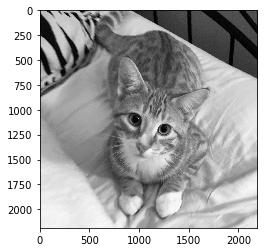

In [0]:
plt.imshow(img, cmap='gray', vmin=0, vmax=255, interpolation=None)
print(img)

[[ 73  73  78 ... 141 145 145]
 [ 76  74  76 ... 143 145 144]
 [ 76  69  73 ... 142 145 147]
 ...
 [ 94  94  92 ... 110 113 117]
 [ 92  91  92 ... 110 114 117]
 [ 92  91  92 ... 110 113 115]]


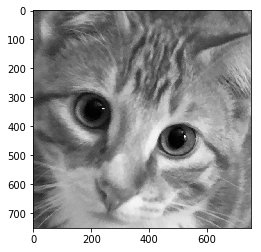

In [0]:
roi = img[750:1500, 750:1500]
plt.imshow(roi, cmap='gray', vmin=0, vmax=255, interpolation=None)
print(roi)

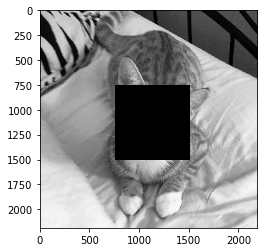

In [0]:
copia = img.copy()
copia[750:1500, 750:1500] = 0
plt.imshow(copia, cmap='gray', vmin=0, vmax=255, interpolation=None)

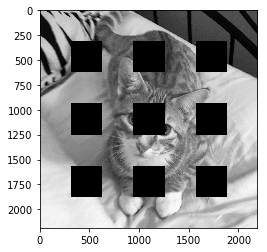

In [0]:
copia = img.copy()
copia[::2, ::2] = 0
plt.imshow(copia, cmap='gray', vmin=0, vmax=255, interpolation=None)

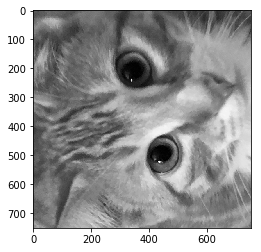

In [0]:
plt.imshow(roi.transpose(), cmap='gray', vmin=0, vmax=255, interpolation=None)

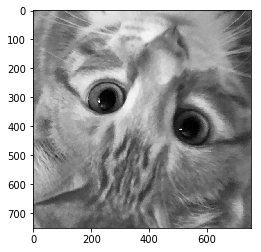

In [0]:
flipped = roi[::-1,::-1]
plt.imshow(flipped, cmap='gray', vmin=0, vmax=255, interpolation=None)

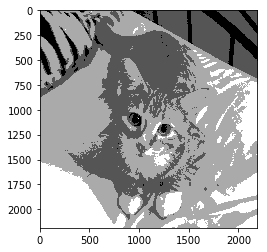

In [0]:
k = 2
L = 2**k
fn = (L-1)*((f - f.min())/(f.max() - f.min()))
fn = np.round(fn)
plt.imshow(fn, cmap='gray', vmin=0, vmax=(L-1), interpolation=None)

Altura 188
Largura 188


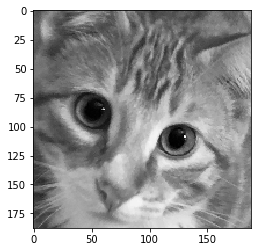

In [0]:
plt.imshow(roi[::4, ::4], cmap='gray', vmin=0, vmax=255, interpolation=None)
print('Altura', roi[::4, ::4].shape[0])
print('Largura', roi[::4, ::4].shape[1])

Altura 47
Largura 47


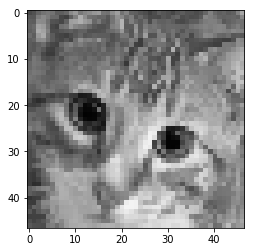

In [0]:
plt.imshow(roi[::16, ::16], cmap='gray', vmin=0, vmax=255, interpolation=None)
print('Altura', roi[::16, ::16].shape[0])
print('Largura', roi[::16, ::16].shape[1])

#Saturação
c = contraste \\
b = brilho \\
$\hat{f}(x,y) = f(x,y) \cdot c + b$

(750, 750)


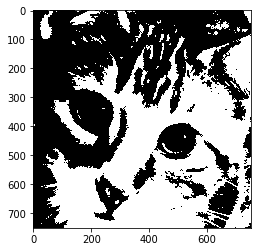

In [0]:
roi_ajuste = np.zeros(roi.shape)
b = 150
c = 0.8

print(roi.shape)

for x in range(0, roi.shape[0]):
  for y in range(0, roi.shape[1]):
    if (roi[x,y]*c + b) > 255:
      roi_ajuste[x,y] = 255
    elif (roi[x,y]*c + b) < 0:
      roi_ajuste[x,y] = 0
    else:
      roi_ajuste[x,y]*c + b
      
plt.imshow(roi_ajuste, cmap='gray', vmin=0, vmax=255, interpolation=None)

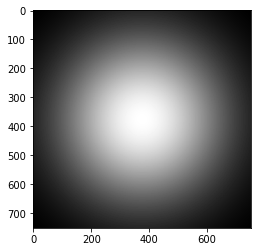

In [0]:
mu = roi.shape[0]/2
sigma = 200
g = np.zeros((roi.shape))

for x in range(0, roi.shape[0]):
  for y in range(0, roi.shape[1]):
    g[x,y] = np.exp(-(((x - mu)**2)/(2*sigma**2) + ((y - mu)**2)/(2*sigma**2)))

roin = ((roi - roi.min())/(roi.max() - roi.min()))
gn = ((g - g.min())/(g.max() - g.min()))
plt.imshow(gn, cmap='gray')

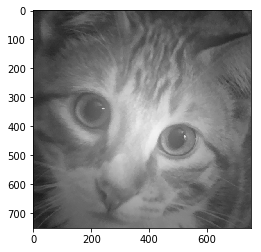

In [0]:
alfa = 0.5
h = roin*alfa + gn*(1-alfa)
plt.imshow(h, cmap='gray', vmin=0, vmax=1, interpolation=None)